In [1]:
import json
import time

In [5]:
def get_babelio_stats(babelioData):
    """
    Statistiques sur la base de donnée Babelio
    On compte les valeurs non-nuls des champs de la base de donnée, et les occurences de leurs valeurs sour les
    champs finissant par "_by_value"
    :param babelioData: Données json de babelio
    :return: statistiques
    """

    stats_book = {
        "total": 0
    }
    stats_author = {
        "total": 0
    }

    for babelio_item in babelioData:
        # on check si il s'agit d'un livre ou d'un auteur
        if "author_id" in babelio_item:
            stats_book["total"] += 1

            # si c'est un auteur, on parcours ses attributs
            for key, value in babelio_item.items():
                # si la clef n'existe pas, on créé une nouvelle catégorie
                if key not in stats_book:
                    stats_book[key] = 0
                # traitement des catégories où l'objet est une simple chaine de caractère
                if key not in ["reviews", "extracts", "author", "resume", "tags"]:
                    # si le compte par occurence n'existe pas, on l'instancie
                    if key + "_by_value" not in stats_book:
                        stats_book[key + "_by_value"] = {value: 1}
                    else:
                        # si la valeur n'est pas dans le compte par occurence, on l'ajoute
                        if value not in stats_book[key + "_by_value"]:
                            stats_book[key + "_by_value"][value] = 0
                        # sinon, on compte +1 pour cette valeur
                        stats_book[key + "_by_value"][value] += 1
                # pour l'auteur ou le résumé, on doit regrouper les informations avant de les compter,
                # car c'est un tableau de chaine de caractère, on ne veut pas considérer "jean" comme une valeur,
                # mais bien "jean nom_de_famille" par exemple
                elif key == "author" or key == "resume":
                    if key + "_by_value" not in stats_book:
                        stats_book[key + "_by_value"] = {" ".join(value): 1}
                    else:
                        if " ".join(value) not in stats_book[key + "_by_value"]:
                            stats_book[key + "_by_value"][" ".join(value)] = 0
                        stats_book[key + "_by_value"][" ".join(value)] += 1
                    if key == "resume":
                        resumes.append(" ".join(value))
                # pour les tags, on doit faire la différence entre les tags,
                # et donc compter les tags individuellement
                elif key == "tags":
                    for value_ in value:
                        if key + "_by_value" not in stats_book:
                            stats_book[key + "_by_value"] = {value_["tag"]: 1}
                        else:
                            if value_["tag"] not in stats_book[key + "_by_value"]:
                                stats_book[key + "_by_value"][value_["tag"]] = 0
                            stats_book[key + "_by_value"][value_["tag"]] += 1
                # cas où les informations sont sous une couche de plus (reviews et extract)
                # exemple: reviews ont un identifiant, un auteur, etc...
                # on doit donc faire une couche de plus d'analyse
                else:
                    if key == "reviews":
                        reviews.append(value)
                    if key == "extracts":
                        extracts.append(value)
                    if key + "_by_value" not in stats_book:
                        stats_book[key + "_by_value"] = {}
                    if value:
                        for key_, value_ in value[0].items():
                            if key_ not in stats_book[key + "_by_value"]:
                                stats_book[key + "_by_value"][key_] = 0
                            if key_ == 'author' or key_ == 'content':
                                value_ = " ".join(value_)
                            if key_ + "_by_value" not in stats_book[key + "_by_value"]:
                                stats_book[key + "_by_value"][key_ + "_by_value"] = {value_: 1}
                            else:
                                if value_ not in stats_book[key + "_by_value"][key_ + "_by_value"]:
                                    stats_book[key + "_by_value"][key_ + "_by_value"][value_] = 0
                                stats_book[key + "_by_value"][key_ + "_by_value"][value_] += 1
                            stats_book[key + "_by_value"][key_] += 1
                    else:
                        if "None" not in stats_book[key + "_by_value"]:
                            stats_book[key + "_by_value"]["None"] = 0
                        stats_book[key + "_by_value"]["None"] += 1 
                stats_book[key] += 1
        else:
            stats_author["total"] += 1
            for key, value in babelio_item.items():
                if key not in stats_author:
                    stats_author[key] = 0
                if key not in ["bio", "tags", "friends", 'bibliography', 'media', 'prices']:
                    if key + "_by_value" not in stats_author:
                        stats_author[key + "_by_value"] = {value: 1}
                    else:
                        if value not in stats_author[key + "_by_value"]:
                            stats_author[key + "_by_value"][value] = 0
                        stats_author[key + "_by_value"][value] += 1
                elif key == "bio":
                    if key + "_by_value" not in stats_author:
                        stats_author[key + "_by_value"] = {" ".join(value): 1}
                    else:
                        if " ".join(value) not in stats_author[key + "_by_value"]:
                            stats_author[key + "_by_value"][" ".join(value)] = 0
                        stats_author[key + "_by_value"][" ".join(value)] += 1
                elif key == "tags":
                    for value_ in value:
                        if key + "_by_value" not in stats_author:
                            stats_author[key + "_by_value"] = {value_["tag"]: 1}
                        else:
                            if value_["tag"] not in stats_author[key + "_by_value"]:
                                stats_author[key + "_by_value"][value_["tag"]] = 0
                            stats_author[key + "_by_value"][value_["tag"]] += 1

                elif key in ["friends", 'bibliography', 'prices']:
                    if key + "_by_value" not in stats_book:
                        stats_author[key + "_by_value"] = {}
                    for value_ in value:
                        if key + "_by_value" not in stats_author:
                            stats_author[key + "_by_value"] = {value_: 1}
                        else:
                            if value_ not in stats_author[key + "_by_value"]:
                                stats_author[key + "_by_value"][value_] = 0
                            stats_author[key + "_by_value"][value_] += 1

                elif key == 'media':
                    if key + "_by_value" not in stats_author:
                        stats_author[key + "_by_value"] = {}
                    if value:
                        for key_, value_ in value[0].items():
                            if key_ not in stats_author[key + "_by_value"]:
                                stats_author[key + "_by_value"][key_] = 0
                            if key_ == 'author' or key_ == 'description':
                                value_ = " ".join(value_)
                            if key_ + "_by_value" not in stats_author[key + "_by_value"]:
                                stats_author[key + "_by_value"][key_ + "_by_value"] = {value_: 1}
                            else:
                                if value_ not in stats_author[key + "_by_value"][key_ + "_by_value"]:
                                    stats_author[key + "_by_value"][key_ + "_by_value"][value_] = 0
                                stats_author[key + "_by_value"][key_ + "_by_value"][value_] += 1
                            stats_author[key + "_by_value"][key_] += 1
                    else:
                        if "None" not in stats_author[key + "_by_value"]:
                            stats_author[key + "_by_value"]["None"] = 0
                        stats_author[key + "_by_value"]["None"] += 1 
                stats_author[key] += 1
    # on trie par valeur
    for key, value in stats_book.items():
        if isinstance(value, dict):
            stats_book[key] = {k: v for k, v in sorted(stats_book[key].items(),
                                                       key=lambda item: item[1] if isinstance(item[1], int) else 0, reverse=True)}
    for key, value in stats_author.items():
        if isinstance(value, dict):
            stats_author[key] = {k: v for k, v in sorted(stats_author[key].items(),
                                                       key=lambda item: item[1] if isinstance(item[1], int) else 0, reverse=True)}
    return stats_book, stats_author


def format_result(res):
    """
    permet de formater les stats avant de les sauvegarder/afficher
    :param res: resultat d'un get_stats()
    :return: res formaté
    """

    def check_len_str(stat):
        """
        Si la longeure de la chaine de caractère est trop importante, on la coupe après 100 caractères
        :param stat: chaine de caractère
        :return: chaine de caractère tronquée
        """
        if isinstance(stat, str):
            if len(stat) > 100:
                return stat[:100] + "..."
            else:
                return stat
        else:
            return stat

    cleaned_res = {}
    for key, stat in res.items():
        cleaned_res[key] = {}
        if isinstance(stat, dict):
            # on selectionne uniquement les 10 plus fréquents items si il y en a plus de 10,
            # et on tronque leurs longueures
            nested = False
            for value in list(stat.values()):
                if isinstance(value, dict):
                    nested = True
            if not nested:
                if len(list(stat.items())) > 10:
                    cleaned_res[check_len_str(key)] = dict([(check_len_str(k), v) for k, v in sorted(stat.items(), key=lambda item: item[1], reverse=True)][:10])
                else:
                    cleaned_res[check_len_str(key)] = stat
            else:
                # si il y a une couche de plus, on selectionne les 10 premiers elements et on tronque leurs longueure
                for key_stat, stat_value in stat.items():
                    if isinstance(stat_value, dict):
                        if len(list(stat_value.items())) > 10:
                            cleaned_res[check_len_str(key)][check_len_str(key_stat)] = dict([(check_len_str(k), v) for k, v in sorted(stat_value.items(), key=lambda item: item[1], reverse=True)][:10])
                        else:
                            cleaned_res[check_len_str(key)][check_len_str(key_stat)] = stat_value
                    else:
                        cleaned_res[check_len_str(key)][check_len_str(key_stat)] = stat_value
        # si c'est un entier, on tronque juste la taille de la clef
        elif isinstance(stat, int):
            cleaned_res[check_len_str(key)] = stat

    # on affiche le resultat avant la sauvegarde
    json_print = json.dumps(cleaned_res, indent=2, ensure_ascii=False)
    print(json_print)
    return cleaned_res


# Analyse globale

In [6]:
Babaelio_loading_time = time.time()
babelioJson = open("./item.json", "r")
babelioData = json.load(babelioJson)[0:]
babelioJson.close()
resumes = []
extracts = []
reviews = []
stats_book_babelio, stats_author_babelio = get_babelio_stats(babelioData)
print("babelio_loading_time: ", time.time() - Babaelio_loading_time)
_ = format_result(stats_book_babelio)

babelio_loading_time:  0.4282379150390625
{
  "total": 2041,
  "url": 2041,
  "url_by_value": {
    "https://www.babelio.com/livres/Letourneau-Notre-Duplex/655410": 1,
    "https://www.babelio.com/livres/Lepage-Vers-lOuest/152344": 1,
    "https://www.babelio.com/livres/Belisle-Planete-verte/710115": 1,
    "https://www.babelio.com/livres/Cloutier-Independance-Le-PQ-a-trahi-ses-militants/1129490": 1,
    "https://www.babelio.com/livres/Brisebois-Coups-de-feu-au-Forum/723616": 1,
    "https://www.babelio.com/livres/Girard-Les-Belles-Soeurs--Loeuvre-qui-a-tout-change/1038624": 1,
    "https://www.babelio.com/livres/Morgan-Les-Flibustieres-Bonny-Read/934415": 1,
    "https://www.babelio.com/livres/Barranger-Maria-chappe-de-haine/287218": 1,
    "https://www.babelio.com/livres/Jacques-La-tete-de-mort/1184443": 1,
    "https://www.babelio.com/livres/Leclerc-La-vie-rurale-1866-1953/542075": 1
  },
  "title": 2041,
  "title_by_value": {
    " Mon pays à feu et à sang ": 2,
    " Sociologie co

In [7]:
_ = format_result(stats_author_babelio)

{
  "total": 1419,
  "url": 1419,
  "url_by_value": {
    "https://www.babelio.com/auteur/Stephane-Dompierre/28928": 1,
    "https://www.babelio.com/auteur/Mike-Burns/305090": 1,
    "https://www.babelio.com/auteur/Roxanne-Bouchard/145381": 1,
    "https://www.babelio.com/auteur/Micheline-Despres-Poirier/397251": 1,
    "https://www.babelio.com/auteur/Robin-Philpot/237701": 1,
    "https://www.babelio.com/auteur/Pierre-Daveluy/376043": 1,
    "https://www.babelio.com/auteur/Claire-Armange/317902": 1,
    "https://www.babelio.com/auteur/Yve-Lavigueur/292629": 1,
    "https://www.babelio.com/auteur/Emilie-Plante/542548": 1,
    "https://www.babelio.com/auteur/Cristina-Minelle/228862": 1
  },
  "name": 1419,
  "name_by_value": {
    " Stéphane Dompierre": 1,
    " Mike Burns": 1,
    " Roxanne Bouchard": 1,
    " Micheline Després-Poirier": 1,
    " Robin Philpot": 1,
    " Pierre Daveluy": 1,
    " Claire Armange": 1,
    " Yve Lavigueur": 1,
    " Emilie Plante": 1,
    " Cristina Minel

# Analyse des résumés
longeur moyenne, mediane, max et min

moyenne du nombre de caractères:  425.5531602155806
medianne du nombre de caractères:  468
ecart-typedu nombre de caractères:  103.29098781453494
maximum du nombre de caractères:  475
minimum du nombre de caractères non nul:  20
longueure des 10 plus long résumé:  [475, 475, 475, 475, 475, 475, 475, 475, 475, 475]
longueure des 10 plus courts résumé:  [20, 23, 23, 24, 26, 26, 27, 28, 49, 59]

Nombre de non-nul:  1990 , nombre de nul:  51
fréquences des tailles de résumés


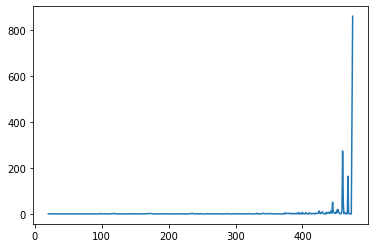

In [98]:
from statistics import *
from itertools import *
from collections import *
import matplotlib.pyplot as plt
lenght = []
for resume in resumes:
    lenght.append(len(resume))
print("moyenne du nombre de caractères: ", mean(lenght))
print("medianne du nombre de caractères: ", median(lenght))
print("ecart-typedu nombre de caractères: ", pstdev(lenght))
print("maximum du nombre de caractères: ", max(lenght))
print("minimum du nombre de caractères non nul: ", min([x for x in lenght if (x != 0) and x]))
print("longueure des 10 plus long résumé: ", sorted(lenght, reverse=True)[:10])
print("longueure des 10 plus courts résumé: ",sorted([x for x in lenght if x != 0 and x])[:10])
print("\nNombre de non-nul: ", len([x for x in lenght if (x != 0) and x]), ", nombre de nul: ", len([x for x in lenght if (x == 0) or not x]))
print("fréquences des tailles de résumés")
test = Counter([x for x in lenght if x != 0 and x])
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()

# Analyse des revues

In [99]:
numbers = []
lenght = []
ratings = []
for review_ls in reviews:
    if not review_ls:
        numbers.append(0)
    else:
        for review in review_ls:
            ratings.append(float(review["rating"]) if review["rating"] else review["rating"])
            lenght.append(len(" ".join(review["content"])))
        numbers.append(len(review_ls))

moyenne du nombre de lignes:  2.5923566878980893
medianne du nombre de lignes:  1
ecart-typedu nombre de lignes:  7.838048406604039
maximum du nombre de lignes:  127
minimum du nombre de lignes non nul:  1

Nombre de non-nul:  1093 , nombre de nul:  2
fréquences des tailles de résumés


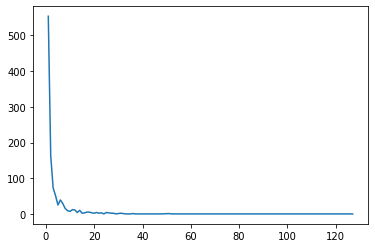

In [100]:
print("moyenne du nombre de lignes: ", mean(numbers))
print("medianne du nombre de lignes: ", median(numbers))
print("ecart-typedu nombre de lignes: ", pstdev(numbers))
print("maximum du nombre de lignes: ", max(numbers))
print("minimum du nombre de lignes non nul: ", min([x for x in numbers if x != 0 and x]))
print("\nNombre de non-nul: ", len([x for x in numbers if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("fréquences des tailles de résumés")
test = Counter([x for x in numbers if x != 0 and x])
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()



moyenne du nombre de caractères:  968.7684747684748
medianne du nombre de caractères:  738
ecart-typedu nombre de caractères:  852.013078111719
maximum du nombre de caractères:  6747
minimum du nombre de caractères non nul:  5

Nombre de non-nul:  5289 , nombre de nul:  2
fréquences des tailles de résumés


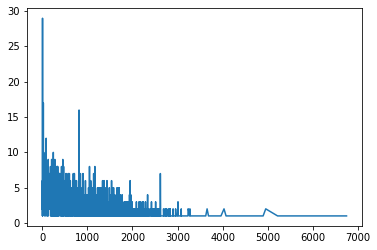

In [101]:
print("\nmoyenne du nombre de caractères: ", mean(lenght))
print("medianne du nombre de caractères: ", median(lenght))
print("ecart-typedu nombre de caractères: ", pstdev(lenght))
print("maximum du nombre de caractères: ", max(lenght))
print("minimum du nombre de caractères non nul: ", min([x for x in lenght if x != 0 and x]))
print("\nNombre de non-nul: ", len([x for x in lenght if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("fréquences des tailles de résumés")
test = Counter(lenght)
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()



moyenne des notes:  3.815463701216953
medianne des notes:  4.0
ecart-type des notes:  1.0214290554928507
maximum des notes:  5.0

Nombre de non-nul:  4766 , nombre de nul:  525
fréquences des tailles de résumés


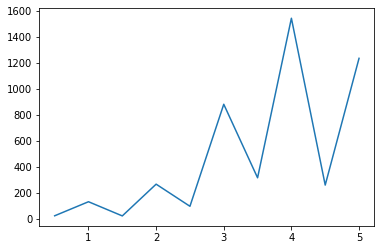

In [106]:
print("\nmoyenne des notes: ", mean([x for x in ratings if x]))
print("medianne des notes: ", median([x for x in ratings if x]))
print("ecart-type des notes: ", pstdev([x for x in ratings if x]))
print("maximum des notes: ", max([x for x in ratings if x]))
print("\nNombre de non-nul: ", len([x for x in ratings if x != 0 and x]), ", nombre de nul: ", len([x for x in ratings if x == 0 or not x]))
print("fréquences des tailles de résumés")
test = Counter([x for x in ratings if x != 0 and x])
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()


# Analyse des extraits

In [103]:
lenght = []
for extract_ls in extracts:
    if not extract_ls:
        numbers.append(0)
    else:
        for extract in extract_ls:
            lenght.append(len(" ".join(extract["content"])))
        numbers.append(len(extract_ls))

moyenne du nombre de lignes:  3.1825085742283195
medianne du nombre de lignes:  0.0
ecart-typedu nombre de lignes:  9.554929404326126
maximum du nombre de lignes:  245
minimum du nombre de lignes non nul:  1

Nombre de non-nul:  1965 , nombre de nul:  2117
fréquences des tailles de résumés


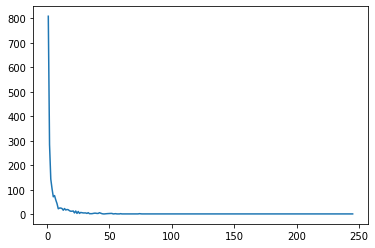

In [107]:
print("moyenne du nombre de lignes: ", mean(numbers))
print("medianne du nombre de lignes: ", median(numbers))
print("ecart-typedu nombre de lignes: ", pstdev(numbers))
print("maximum du nombre de lignes: ", max(numbers))
print("minimum du nombre de lignes non nul: ", min([x for x in numbers if x != 0 and x]))
print("\nNombre de non-nul: ", len([x for x in numbers if x != 0 and x]), ", nombre de nul: ", len([x for x in numbers if x == 0 or not x]))
print("fréquences des tailles de résumés")
test = Counter([x for x in numbers if x != 0 and x])
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()

moyenne du nombre de caractères:  340.0609090909091
medianne du nombre de caractères:  240.0
ecart-typedu nombre de caractères:  377.3335319608247
maximum du nombre de caractères:  9079
minimum du nombre de caractères non nul:  7
longueure des 10 plus long résumé:  [9079, 6720, 5100, 4848, 4476, 4466, 4184, 3786, 3724, 3561]
longueure des 10 plus courts résumé:  [7, 13, 15, 15, 18, 19, 20, 21, 22, 22]

Nombre de non-nul:  7699 , nombre de nul:  1
fréquences des tailles de résumés


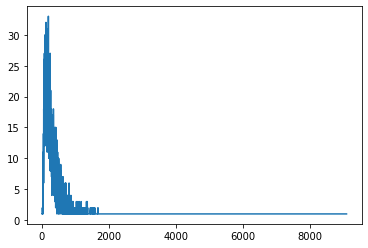

In [108]:
print("moyenne du nombre de caractères: ", mean(lenght))
print("medianne du nombre de caractères: ", median(lenght))
print("ecart-typedu nombre de caractères: ", pstdev(lenght))
print("maximum du nombre de caractères: ", max(lenght))
print("minimum du nombre de caractères non nul: ", min([x for x in lenght if x != 0 and x]))
print("longueure des 10 plus long résumé: ", sorted(lenght, reverse=True)[:10])
print("longueure des 10 plus courts résumé: ",sorted([x for x in lenght if x != 0 and x])[:10])
print("\nNombre de non-nul: ", len([x for x in lenght if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("fréquences des tailles de résumés")
test = Counter([x for x in lenght if x != 0 and x])
x, y = zip(*sorted(test.items()))
plt.plot(x, y)
plt.show()